# t-tests-full-rec-2-24

This notebook runs t-tests on all subjects, based on `ya-oa-full-rec-slopes-2-24.csv`, which had linear regression computed from 2 - 24 Hz and the removal of an alpha buffer between 7 - 14 Hz.

$$
H_0: \mu(YA_{slope}) = \mu(OA_{slope})
$$

$$
H_a: \mu(YA_{slope}) < \mu(OA_{slope})
$$

In [3]:
%matplotlib inline
import seaborn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
mpl.rcParams['figure.figsize'] = (16, 10)

Importing `ya-oa-full-rec-slopes-2-24.csv`...

In [59]:
df = pd.read_csv('../data/pipeline-full/ya-oa-full-rec-slopes-2-24.csv')
df.head()

,SUBJECT,CLASS,AGE,SEX,AVG_OA_PSD_EYESC,AVG_OA_PSD_EYESO,AVG_YA_PSD_EYESC,AVG_YA_PSD_EYESO,AVG_PSD_EYESC,AVG_PSD_EYESO,...,FRONTAL_EYESC,FRONTAL_EYESO,LTEMPORAL_EYESC,LTEMPORAL_EYESO,CENTRAL_EYESC,CENTRAL_EYESO,RTEMPORAL_EYESC,RTEMPORAL_EYESO,OCCIPITAL_EYESC,OCCIPITAL_EYESO
0,120127101,SA_Control,80.84873,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-6.862338,-5.993324,...,-8.672824,-7.766009,-10.355797,-9.870920,-8.886973,-9.256354,-9.514349,-8.718649,-7.726645,-7.131687
1,120127102,MCI_Control,71.89870,1.0,-4.34227,-3.134892,-6.051054,-5.046973,-5.043768,-1.707319,...,-6.822904,-3.996478,-6.491346,-3.017757,-6.675483,-5.742492,-5.226341,-1.570847,-6.432560,-3.653080
2,120127103,MCI_Control,69.43463,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-4.404398,-2.421660,...,-4.235969,-4.397806,-6.102922,-5.551192,-6.771141,-6.602679,-5.542418,-5.150955,-3.417101,-3.998930
3,120127104,SA_Control,83.61396,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-4.147895,-2.305099,...,-6.391124,-4.478913,-6.255836,-5.451922,-5.435296,-4.705022,-5.914093,-4.571635,-6.477717,-5.189071
4,120127105,SA_Control,80.69541,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-5.327249,-5.730176,...,-6.609690,-5.981445,-6.667336,-5.432904,-7.119155,-6.554409,-7.226378,-6.100613,-8.148066,-8.137746


## Voytek groups
Let's look at the groups that Brad was looking at:
- Younger adults up to 35.
- Older adults over the age of 60 who are not super-agers.

In [37]:
oa = df[df.AGE >= 60]
oa = oa[oa.CLASS != 'SA']
ya = df[df.AGE <= 35.5] 

In [40]:
print(oa.shape)
print(ya.shape)

(37, 126)
(31, 126)


In [55]:
channels = ["AVG_OA_PSD_EYESC","AVG_OA_PSD_EYESO","AVG_YA_PSD_EYESC","AVG_YA_PSD_EYESO","AVG_PSD_EYESC","AVG_PSD_EYESO","A1_EYESC","A1_EYESO","A2_EYESC","A2_EYESO","A3_EYESC","A3_EYESO","A4_EYESC","A4_EYESO","A5_EYESC","A5_EYESO","A6_EYESC","A6_EYESO","A7_EYESC","A7_EYESO","A8_EYESC","A8_EYESO","A10_EYESC","A10_EYESO","A11_EYESC","A11_EYESO","A12_EYESC","A12_EYESO","A13_EYESC","A13_EYESO","A14_EYESC","A14_EYESO","A15_EYESC","A15_EYESO","A16_EYESC","A16_EYESO","A17_EYESC","A17_EYESO","A18_EYESC","A18_EYESO","A21_EYESC","A21_EYESO","A22_EYESC","A22_EYESO","A23_EYESC","A23_EYESO","A24_EYESC","A24_EYESO","A25_EYESC","A25_EYESO","A26_EYESC","A26_EYESO","A27_EYESC","A27_EYESO","A29_EYESC","A29_EYESO","A30_EYESC","A30_EYESO","A31_EYESC","A31_EYESO","B1_EYESC","B1_EYESO","B2_EYESC","B2_EYESO","B3_EYESC","B3_EYESO","B4_EYESC","B4_EYESO","B5_EYESC","B5_EYESO","B6_EYESC","B6_EYESO","B8_EYESC","B8_EYESO","B9_EYESC","B9_EYESO","B10_EYESC","B10_EYESO","B11_EYESC","B11_EYESO","B12_EYESC","B12_EYESO","B13_EYESC","B13_EYESO","B14_EYESC","B14_EYESO","B17_EYESC","B17_EYESO","B18_EYESC","B18_EYESO","B19_EYESC","B19_EYESO","B20_EYESC","B20_EYESO","B21_EYESC","B21_EYESO","B22_EYESC","B22_EYESO","B23_EYESC","B23_EYESO","B24_EYESC","B24_EYESO","B26_EYESC","B26_EYESO","B27_EYESC","B27_EYESO","B28_EYESC","B28_EYESO","B29_EYESC","B29_EYESO","B30_EYESC","B30_EYESO","FRONTAL_EYESC","FRONTAL_EYESO","LTEMPORAL_EYESC","LTEMPORAL_EYESO","CENTRAL_EYESC","CENTRAL_EYESO","RTEMPORAL_EYESC","RTEMPORAL_EYESO","OCCIPITAL_EYESC","OCCIPITAL_EYESO"]
for ch in channels:
    result = stats.ttest_ind(ya[ch], oa[ch], equal_var=False)
    if result[1] < 0.05:
        print("{}:\t{:.2f},\t{:.3f}".format(ch, result[0], result[1]))

AVG_OA_PSD_EYESC:	-6.00,	0.000
AVG_YA_PSD_EYESC:	2.49,	0.017
AVG_YA_PSD_EYESO:	-2.49,	0.017
AVG_PSD_EYESO:	-3.24,	0.002
A1_EYESO:	-2.62,	0.011
A4_EYESO:	-2.31,	0.024
A5_EYESO:	-3.07,	0.003
A14_EYESO:	-2.86,	0.006
A15_EYESO:	-2.59,	0.012
A24_EYESO:	-2.17,	0.034
A27_EYESO:	-2.41,	0.019
A29_EYESO:	-2.01,	0.048
A30_EYESO:	-2.86,	0.006
A31_EYESO:	-2.29,	0.025
B1_EYESO:	-3.43,	0.001
B3_EYESO:	-3.37,	0.001
B4_EYESO:	-2.43,	0.018
B11_EYESO:	-2.61,	0.011
B17_EYESO:	-2.22,	0.030
B23_EYESO:	-2.42,	0.018
B26_EYESO:	-2.26,	0.027
B29_EYESO:	-2.25,	0.028
FRONTAL_EYESO:	-4.02,	0.000
CENTRAL_EYESO:	-2.63,	0.011
RTEMPORAL_EYESC:	-2.13,	0.037
RTEMPORAL_EYESO:	-2.86,	0.006
OCCIPITAL_EYESO:	-2.88,	0.005


| Channel   | T-Statistic | P-Value  |
|-----------|-------------|----------|
| AVG_PSD_EYESO:  | -3.24 |0.002 |
| A1_EYESO:  | -2.62 |	0.011 |
| A4_EYESO:  | -2.31 |	0.024 |
| A5_EYESO:  | -3.07 |	0.003 |
| A14_EYESO:  | -2.86 |	0.006 |
| A15_EYESO:  | -2.59 |	0.012 |
| A24_EYESO:  | -2.17 |	0.034 |
| A27_EYESO:  | -2.41 |	0.019 |
| A29_EYESO:  | -2.01 |	0.048 |
| A30_EYESO:  | -2.86 |	0.006 |
| A31_EYESO:  | -2.29 |	0.025 |
| B1_EYESO:  | -3.43 |	0.001 |
| B3_EYESO:  | -3.37 |	0.001 |
| B4_EYESO:  | -2.43 |	0.018 |
| B11_EYESO:  | -2.61 |	0.011 |
| B17_EYESO:  | -2.22 |	0.030 |
| B23_EYESO:  | -2.42 |	0.018 |
| B26_EYESO:  | -2.26 |	0.027 |
| B29_EYESO:  | -2.25 |	0.028 |
| FRONTAL_EYESO:  | -4.02 |0.000 |
| CENTRAL_EYESO:  | -2.63 |0.011 |
| RTEMPORAL_EYESC:  | -2.13 |  0.037 |
| RTEMPORAL_EYESO:  | -2.86 |  0.006 |
| OCCIPITAL_EYESO:  | -2.88 |  0.005 |

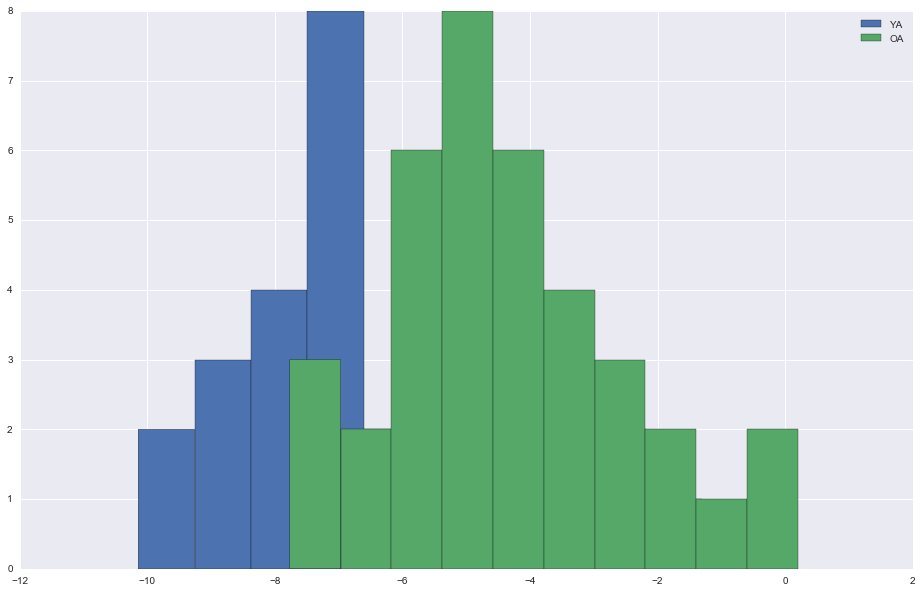

In [71]:
a, b, c = plt.hist(ya.FRONTAL_EYESO, label='YA')
a, b, c = plt.hist(oa.FRONTAL_EYESO, label='OA')
plt.legend()

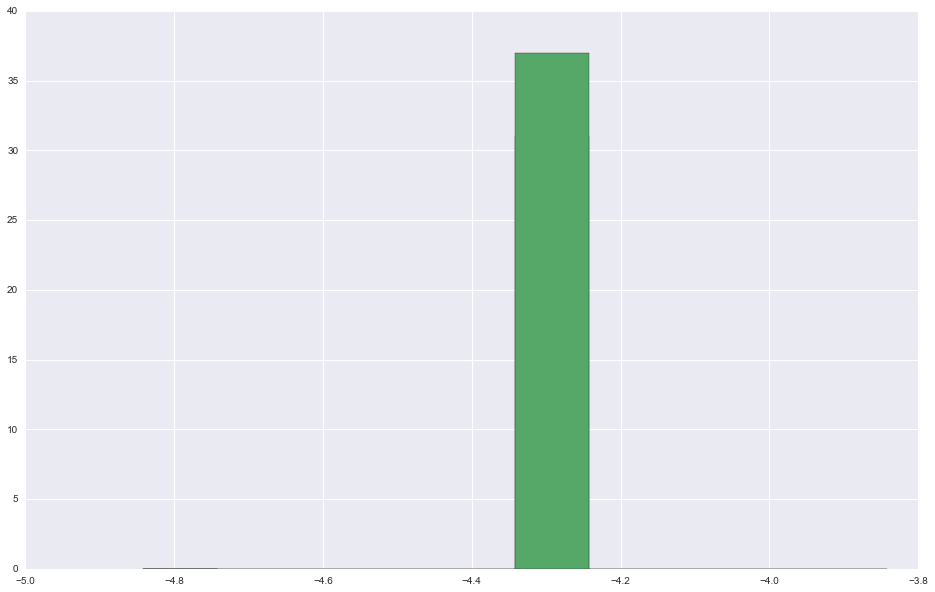

In [72]:
a, b, c = plt.hist(ya.AVG_OA_PSD_EYESC)
a, b, c = plt.hist(oa.AVG_OA_PSD_EYESC)

In [74]:
ya.AVG_OA_PSD_EYESC

54   -4.34227
55   -4.34227
56   -4.34227
57   -4.34227
58   -4.34227
59   -4.34227
62   -4.34227
64   -4.34227
66   -4.34227
67   -4.34227
68   -4.34227
70   -4.34227
71   -4.34227
72   -4.34227
73   -4.34227
74   -4.34227
75   -4.34227
76   -4.34227
77   -4.34227
78   -4.34227
79   -4.34227
80   -4.34227
81   -4.34227
82   -4.34227
83   -4.34227
84   -4.34227
85   -4.34227
86   -4.34227
87   -4.34227
88   -4.34227
89   -4.34227
Name: AVG_OA_PSD_EYESC, dtype: float64

In [75]:
oa.AVG_OA_PSD_EYESC

0    -4.34227
1    -4.34227
2    -4.34227
3    -4.34227
4    -4.34227
5    -4.34227
7    -4.34227
8    -4.34227
9    -4.34227
10   -4.34227
11   -4.34227
13   -4.34227
15   -4.34227
16   -4.34227
20   -4.34227
22   -4.34227
23   -4.34227
24   -4.34227
25   -4.34227
26   -4.34227
27   -4.34227
32   -4.34227
35   -4.34227
38   -4.34227
39   -4.34227
40   -4.34227
42   -4.34227
44   -4.34227
45   -4.34227
46   -4.34227
47   -4.34227
48   -4.34227
49   -4.34227
50   -4.34227
51   -4.34227
52   -4.34227
53   -4.34227
Name: AVG_OA_PSD_EYESC, dtype: float64

'user/local/sbin:/Users/jorge/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/usr/local/share/dotnet:/usr/local/m-cli'